In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
numeric_columns=df.select_dtypes(include=np.number).columns
print(numeric_columns)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


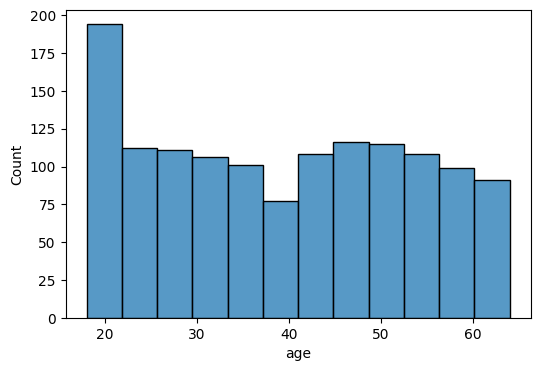

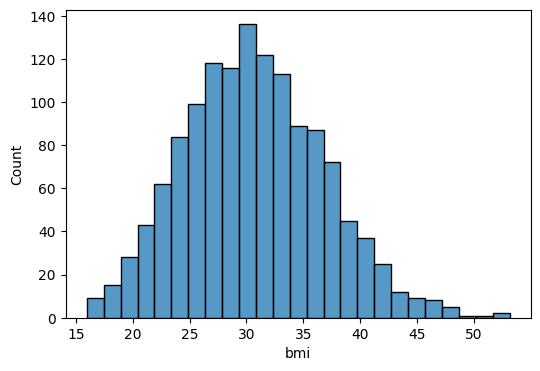

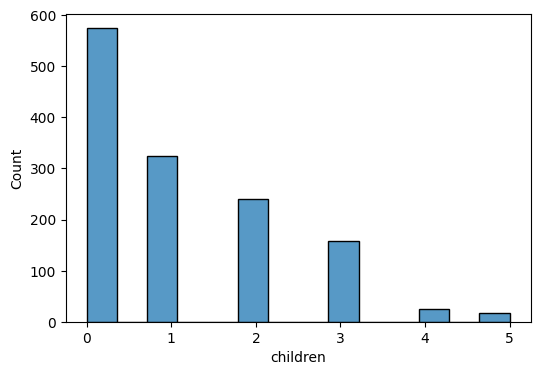

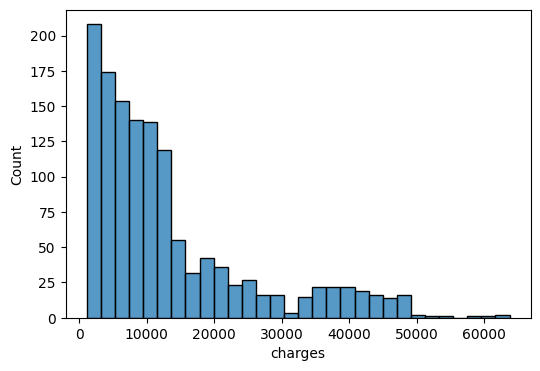

In [11]:
for cols in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols])
    plt.show()

<Axes: xlabel='children', ylabel='count'>

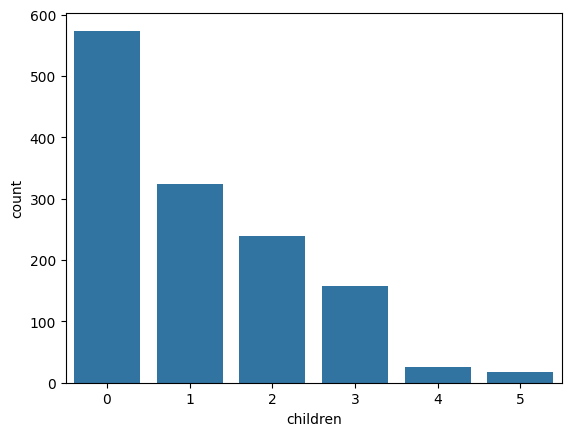

In [12]:
sns.countplot(x=df['children'])

<Axes: xlabel='region', ylabel='count'>

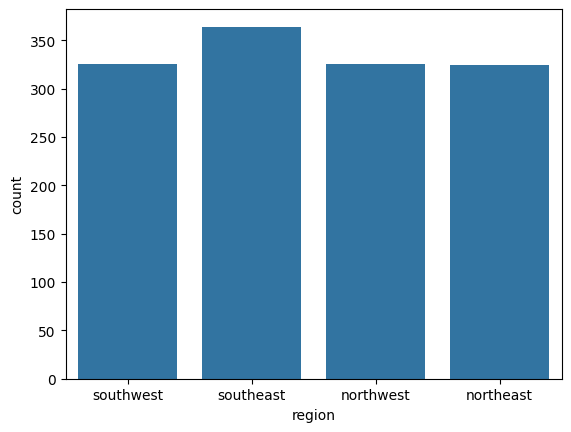

In [13]:
sns.countplot(x=df['region'])

<Axes: xlabel='sex', ylabel='count'>

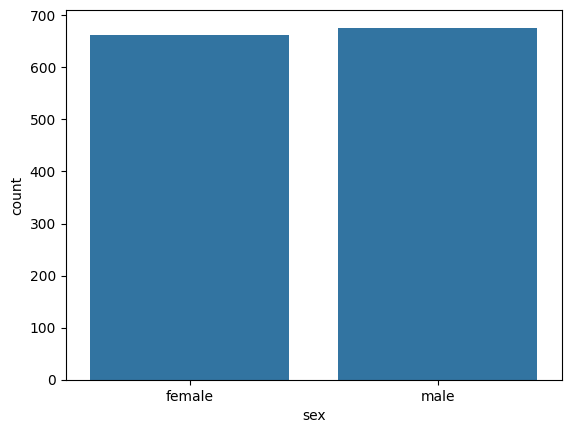

In [14]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

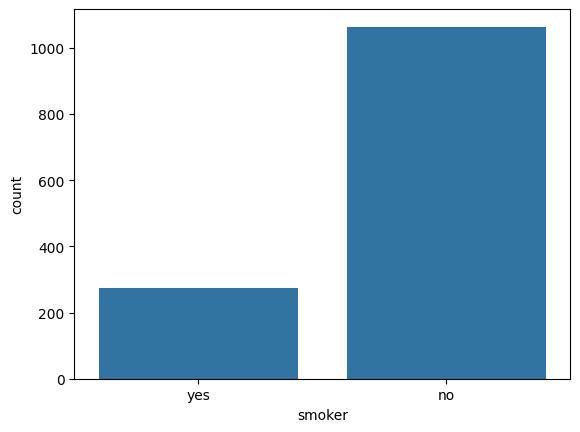

In [15]:
sns.countplot(x=df['smoker'])

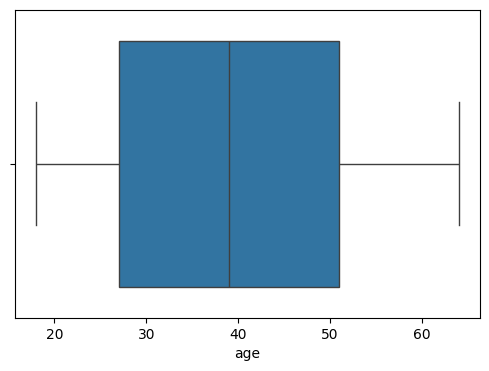

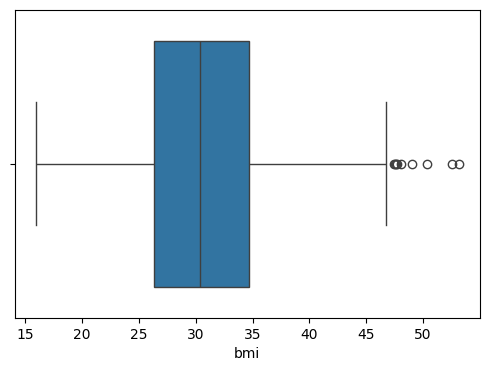

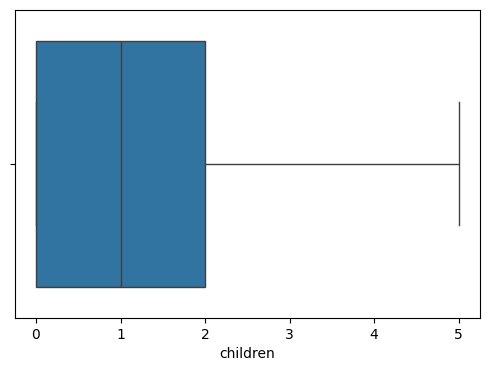

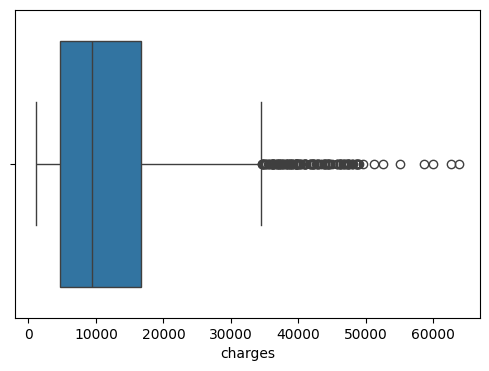

In [16]:
for cols in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[cols])
    plt.show()

<Axes: >

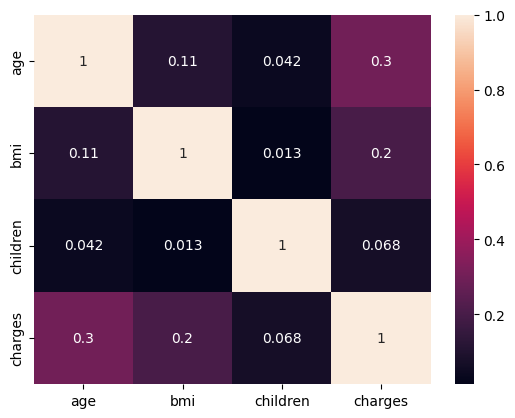

In [17]:
import numpy as np
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)

In [18]:
df_cleaned=df.copy()

In [30]:
df_cleaned.head()
df_cleaned.shape

(1337, 7)

In [31]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.shape

(1337, 7)

In [32]:
df_cleaned['sex'].value_counts()

,count
sex,
0,675
1,662


In [33]:
df_cleaned['sex'] = df_cleaned['sex'].map({'female': 1, 'male': 0})

In [34]:
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

In [35]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

You can now split your data into training and testing sets using `train_test_split` from `sklearn.model_selection` and train a regression model.

In [36]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,NaN,southwest,16884.92400
1,18,NaN,33.770,1,NaN,southeast,1725.55230
2,28,NaN,33.000,3,NaN,southeast,4449.46200
3,33,NaN,22.705,0,NaN,northwest,21984.47061
4,32,NaN,28.880,0,NaN,northwest,3866.85520


Now you can train a regression model using the training data (`X_train` and `y_train`) and evaluate it using the testing data (`X_test` and `y_test`).

In [37]:
df_cleaned.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [41]:
df_cleaned=df_cleaned.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [40]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'])

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [42]:
df_cleaned['bmi_categories']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
    )

In [43]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,NaN,27.900,0,NaN,16884.92400,False,False,False,True,Overweight
1,18,NaN,33.770,1,NaN,1725.55230,False,False,True,False,Obese
2,28,NaN,33.000,3,NaN,4449.46200,False,False,True,False,Obese
3,33,NaN,22.705,0,NaN,21984.47061,False,True,False,False,Normal
4,32,NaN,28.880,0,NaN,3866.85520,False,True,False,False,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,NaN,30.970,3,NaN,10600.54830,False,True,False,False,Obese
1334,18,NaN,31.920,0,NaN,2205.98080,True,False,False,False,Obese
1335,18,NaN,36.850,0,NaN,1629.83350,False,False,True,False,Obese
1336,21,NaN,25.800,0,NaN,2007.94500,False,False,False,True,Overweight


In [44]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_categories'])

In [45]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,NaN,27.900,0,NaN,16884.92400,False,False,False,True,False,False,True,False
1,18,NaN,33.770,1,NaN,1725.55230,False,False,True,False,False,False,False,True
2,28,NaN,33.000,3,NaN,4449.46200,False,False,True,False,False,False,False,True
3,33,NaN,22.705,0,NaN,21984.47061,False,True,False,False,False,True,False,False
4,32,NaN,28.880,0,NaN,3866.85520,False,True,False,False,False,False,True,False


In [ ]:
# df_cleaned=df_cleaned.astype(int) # Removed this line
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [ ]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children'] # Corrected typo
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [ ]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
# df_cleaned = pd.get_dummies(df_cleaned, columns=['is_female', 'region'], drop_first=True)
# display(df_cleaned.head())

In [46]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,NaN,27.900,0,NaN,16884.92400,False,False,False,True,False,False,True,False
1,18,NaN,33.770,1,NaN,1725.55230,False,False,True,False,False,False,False,True
2,28,NaN,33.000,3,NaN,4449.46200,False,False,True,False,False,False,False,True
3,33,NaN,22.705,0,NaN,21984.47061,False,True,False,False,False,True,False,False
4,32,NaN,28.880,0,NaN,3866.85520,False,True,False,False,False,False,True,False


In [47]:
df_cleaned=df_cleaned.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [58]:
# # Convert boolean columns created by get_dummies to integers
# for col in df_cleaned.columns:
#     if df_cleaned[col].dtype == bool:
#         df_cleaned[col] = df_cleaned[col].astype(int)

# # Now convert the entire DataFrame to int
# df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [53]:
df_cleaned['bmi_categories']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

In [54]:
df_cleaned.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese,bmi_categories
0,19,27,0,16884,0,0,0,1,0,0,1,0,Overweight
1,18,33,1,1725,0,0,1,0,0,0,0,1,Obese
2,28,33,3,4449,0,0,1,0,0,0,0,1,Obese
3,33,22,0,21984,0,1,0,0,0,1,0,0,Normal
4,32,28,0,3866,0,1,0,0,0,0,1,0,Overweight


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_categories'], drop_first=True)

In [55]:
df_cleaned

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese,bmi_categories
0,19,27,0,16884,0,0,0,1,0,0,1,0,Overweight
1,18,33,1,1725,0,0,1,0,0,0,0,1,Obese
2,28,33,3,4449,0,0,1,0,0,0,0,1,Obese
3,33,22,0,21984,0,1,0,0,0,1,0,0,Normal
4,32,28,0,3866,0,1,0,0,0,0,1,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,0,0,0,0,0,1,Obese
1334,18,31,0,2205,1,0,0,0,0,0,0,1,Obese
1335,18,36,0,1629,0,0,1,0,0,0,0,1,Obese
1336,21,25,0,2007,0,0,0,1,0,0,1,0,Overweight


In [56]:
df_cleaned=df_cleaned.astype(int)

ValueError: Cannot cast object dtype to int64

In [ ]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children'] # Corrected typo
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,0,1,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,0,1,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,0,1,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,1,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0,-0.027733,1.580926,0,10600,0,1,0,0,0,0,1
1334,-1.509965,1,0.135731,-0.908614,0,2205,1,0,0,0,0,0,1
1335,-1.509965,1,0.953046,-0.908614,0,1629,0,0,1,0,0,0,1
1336,-1.296362,1,-0.845048,-0.908614,0,2007,0,0,0,1,0,1,0
